# **BMEN 415 - Final Project**
**Challenge Model: Convolutional Neural Network**

Nitya Shah

#### Importing the Libraries

In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import keras.utils as image

In [36]:
tf.__version__

'2.9.1'

#### Data Preprocessing

Preprocessing the Training Set

In [37]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('xray_dataset_covid19/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 148 images belonging to 2 classes.


Preprocessing the Test Set

In [38]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('xray_dataset_covid19/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 40 images belonging to 2 classes.


#### Building the CNN

Initializing the CNN

In [39]:
cnn = tf.keras.models.Sequential()

Convolution

In [40]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

Pooling

In [41]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding A Second Convolution Layer

In [42]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Flattening

In [43]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [44]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Outer Layer

In [45]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### Training the CNN

In [46]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Training the CNN on the Training Set and Evaluating it on the Test Set

In [47]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
5/5 [==============================] - 10s 2s/step - loss: 0.7208 - accuracy: 0.5135 - val_loss: 0.6803 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 10s 2s/step - loss: 0.6774 - accuracy: 0.5541 - val_loss: 0.5942 - val_accuracy: 0.9500
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.5926 - accuracy: 0.7973 - val_loss: 0.4546 - val_accuracy: 0.9750
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 0.4957 - accuracy: 0.8243 - val_loss: 0.2531 - val_accuracy: 0.9750
Epoch 5/20
5/5 [==============================] - 8s 2s/step - loss: 0.3999 - accuracy: 0.8176 - val_loss: 0.1304 - val_accuracy: 0.9750
Epoch 6/20
5/5 [==============================] - 8s 2s/step - loss: 0.3268 - accuracy: 0.8446 - val_loss: 0.0926 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 7s 2s/step - loss: 0.2413 - accuracy: 0.9122 - val_loss: 0.1219 - val_accuracy: 0.9500
Epoch 8/20
5/5 [=======================

#### Plotting The Training Loss vs the Validation Loss

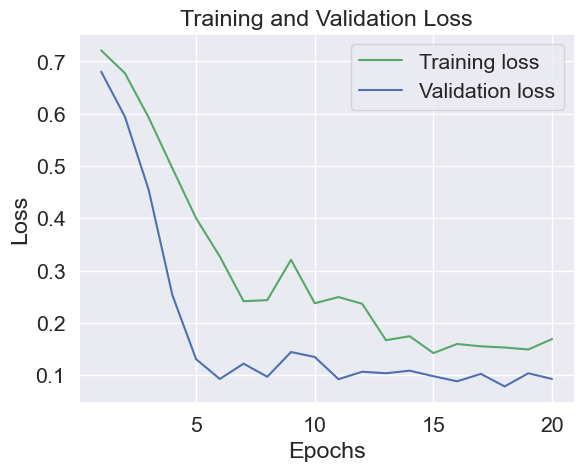

In [91]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting The Training Accuracy vs the Validation Accuracy

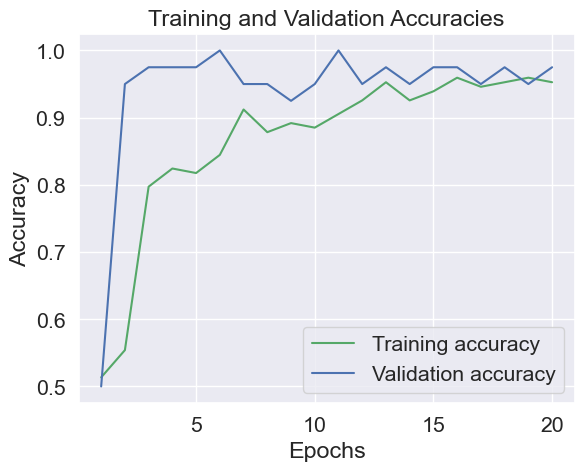

In [90]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Making Predictions

In [48]:
import numpy as np
import keras.utils as image
import os

files_P = os.listdir('xray_dataset_covid19/test/PNEUMONIA/')
results_P = []
intrepret_P = []

for i in range(0, len(files_P)):
    path = 'xray_dataset_covid19/test/PNEUMONIA/' + files_P[i]
    test_image = image.load_img(path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result_P = cnn.predict(test_image) 
    training_set.class_indices 
    results_P.append(result_P[0][0])

    if result_P[0][0] == 1:
        intrepret_P.append('Pneumonia')
    else:
        intrepret_P.append('Normal')

files_N = os.listdir('xray_dataset_covid19/test/NORMAL/')
results_N = []
intrepret_N = []

for i in range(0, len(files_N)):
    path = 'xray_dataset_covid19/test/NORMAL/' + files_N[i]
    test_image = image.load_img(path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result_N = cnn.predict(test_image) 
    training_set.class_indices 
    results_N.append(result_N[0][0])

    if result_N[0][0] == 1:
        intrepret_N.append('Pneumonia')
    else:
        intrepret_N.append('Normal')

df_prediction = pd.DataFrame()
df_prediction['Pneumonia Test Results'] = results_P
df_prediction['Pneumonia Test Results Intrepretation'] = intrepret_P
df_prediction['Normal Test Results'] = results_N
df_prediction['Normal Test Results Intrepretation'] = intrepret_N

df_prediction

1/1 [==============================] - 0s 39ms/step


,Pneumonia Test Results,Pneumonia Test Results Intrepretation,Normal Test Results,Normal Test Results Intrepretation
0,0.000000e+00,Normal,0.0,Normal
1,1.000000e+00,Pneumonia,0.0,Normal
2,1.000000e+00,Pneumonia,0.0,Normal
3,1.000000e+00,Pneumonia,0.0,Normal
4,1.000000e+00,Pneumonia,0.0,Normal
5,1.000000e+00,Pneumonia,0.0,Normal
6,1.000000e+00,Pneumonia,0.0,Normal
7,0.000000e+00,Normal,0.0,Normal
8,2.190432e-09,Normal,0.0,Normal
9,1.000000e+00,Pneumonia,0.0,Normal


#### Results Confusion Matrix

In [87]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(df_prediction)):
    if df_prediction['Normal Test Results Intrepretation'][i] == 'Normal':
        TN += 1
    else:
        FN += 1
        
for i in range(len(df_prediction)):
    if df_prediction['Pneumonia Test Results Intrepretation'][i] == 'Pneumonia':
        TP += 1
    else:
        FP += 1

confusion_matrix = [[TP, FP], [FN, TN]]
confusion_matrix

[[16, 4], [0, 20]]

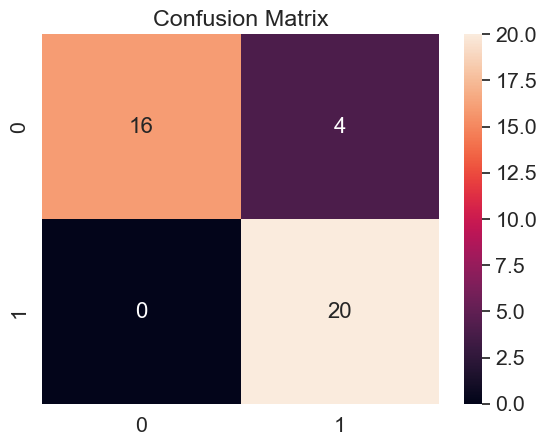

In [88]:
df_cm = pd.DataFrame(confusion_matrix, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.title('Confusion Matrix')
plt.show()